In [27]:
!pip install gtfs-kit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Simulation hyperparameters

In [28]:
number_of_drivers = int(4.3*662.47)
car_speed = 40 #km/h
circuity = 1 # circuity coefficient
detour_rate_percent = 15 # in percent
print(number_of_drivers)

2848


In [29]:
import math
def compute_distance(stop_ids_list):

  distance = 0

  for i in range(len(stop_ids_list)-1):
    
    stop1 = stop_ids_list[i]
    stop2 = stop_ids_list[i+1]

    lat1 = stops_df[stops_df["stop_id"] == stop1].reset_index()['stop_lat'].loc[0]
    lat2 = stops_df[stops_df["stop_id"] == stop2].reset_index()['stop_lat'].loc[0]
    lon1 = stops_df[stops_df["stop_id"] == stop1].reset_index()['stop_lon'].loc[0]
    lon2 = stops_df[stops_df["stop_id"] == stop2].reset_index()['stop_lon'].loc[0]

    φ1 = lat1 * math.pi/180; # φ, λ in radians
    φ2 = lat2 * math.pi/180;
    Δφ = (lat2-lat1) * math.pi/180;
    Δλ = (lon2-lon1) * math.pi/180;

    p = 0.017453292519943295;    # Math.PI / 180
    c = math.cos;
    a = 0.5 - c((lat2 - lat1) * p)/2 + c(lat1 * p) * c(lat2 * p) * (1 - c((lon2 - lon1) * p))/2;
    distance += 12742 * math.asin(math.sqrt(a)) # 2 * R; R = 6371 km

  return circuity * distance; 

## Reading created GTFS data 

In [30]:
import gtfs_kit as gk

path = '/content/drive/MyDrive/walking-driving.gtfs.zip'
gk.list_feed(path)
# Read feed and describe
feed = gk.read_feed(path, dist_units='km')
feed.stop_times.tail(15)

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,continuous_drop_off,continuous_pickup
2366129,11622387002841,11:31:16,11:31:16,DRIVER_destination_2842,26,carpooling stop,0,0,15514.768454,0,NaN,NaN
2366130,11622387002842,10:35:00,10:35:00,DRIVER_origin_2843,24,carpooling stop,0,0,0.000000,0,NaN,NaN
2366131,11622387002842,10:41:50,10:41:50,DRIVER_destination_2843,25,carpooling stop,0,0,4556.321541,0,NaN,NaN
2366132,11622387002843,10:46:00,10:46:00,DRIVER_origin_2844,24,carpooling stop,0,0,0.000000,0,NaN,NaN
2366133,11622387002843,11:00:56,11:00:56,DRIVER_destination_2844,25,carpooling stop,0,0,9966.351680,0,NaN,NaN
2366134,11622387002844,10:50:00,10:50:00,DRIVER_origin_2845,24,carpooling stop,0,0,0.000000,0,NaN,NaN
2366135,11622387002844,10:54:54,10:54:54,10120,25,carpooling stop,0,0,3276.872851,0,NaN,NaN
2366136,11622387002844,10:59:41,10:59:41,DRIVER_destination_2845,26,carpooling stop,0,0,6462.971550,0,NaN,NaN
2366137,11622387002845,10:58:00,10:58:00,DRIVER_origin_2846,24,carpooling stop,0,0,0.000000,0,NaN,NaN
2366138,11622387002845,11:17:08,11:17:08,DRIVER_destination_2846,25,carpooling stop,0,0,12761.247574,0,NaN,NaN


## Computing detours method 1
We can compute detours with only information about the stops, we will infer a circuity coefficient and calculate the distance between all the points.
N.B : getting real results from the JSON response is possible but to be tried outside of google colab

In [31]:
!pip3 install pickle5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


_________________detour for driver  4 ________________________
detour_distance(km) =  15.757689934352774
original_distance(km) =  14.74073762584829
detour percentage =  6.898924153708768 %
_________________detour for driver  10 ________________________
detour_distance(km) =  28.359079896202758
original_distance(km) =  27.014629477836618
detour percentage =  4.976749429301468 %
_________________detour for driver  11 ________________________
detour_distance(km) =  14.112707922810928
original_distance(km) =  13.945685119804898
detour percentage =  1.1976665296195033 %
_________________detour for driver  13 ________________________
detour_distance(km) =  21.108063725845163
original_distance(km) =  18.890224776425633
detour percentage =  11.74066997967816 %
_________________detour for driver  20 ________________________
detour_distance(km) =  8.361075695300006
original_distance(km) =  8.315528703841409
detour percentage =  0.5477341619608163 %
_________________detour for driver  23 ________

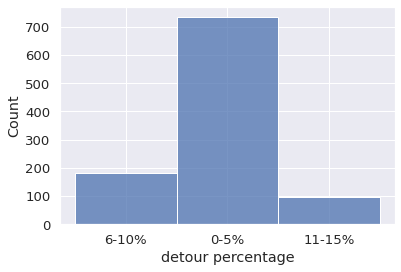

In [32]:

import pickle5 as pickle

def read_data(path):
    with open(path, 'rb') as fh:
        return(pickle.load(fh))

integrated_system_drivers = read_data('/content/drive/MyDrive/pickle/integrated_system_drivers.pkl')
trajectories_list = read_data('/content/drive/MyDrive/trajectories_list.pickle')
detour_labels = []
detours = []
for i in range(len(integrated_system_drivers)):
  if integrated_system_drivers[i]["boarding_alighting_list"] != [] :
    print("_________________detour for driver ",str(i+1),"________________________")
    # compute distance of this path
    stops_df = feed.stops
    stop_ids_list = trajectories_list[i]
    detour_distance = compute_distance(stop_ids_list)
    print("detour_distance(km) = ",detour_distance)
    original_distance = compute_distance(["DRIVER_origin_"+str(i+1),"DRIVER_destination_"+str(i+1)])
    print("original_distance(km) = ",original_distance)
    print("detour percentage = ",(detour_distance - original_distance)*100/original_distance,"%")

    # less boxes
    detours.append(int((detour_distance - original_distance)*100/original_distance))
    if detours[-1] <=5:
      detour_labels.append("0-5%")
    if detours[-1] >5 and detours[-1] <= 10 :
      detour_labels.append("6-10%")
    if detours[-1] > 10 :
      detour_labels.append("11-15%")
print(len(detours))
print(len(detour_labels))
liste = [{"id":i,"detour":detours[i],"detour percentage":detour_labels[i]} for i in range(len(detours))]
import pandas as pd
df = pd.DataFrame(liste)

import seaborn as sns
sns.histplot(data=df,x="detour percentage",bins=3)


## Test URLs
This script generates URLs corresponding to paths from driver's origin to his destination. This is intended to check if OTP considers the path or not

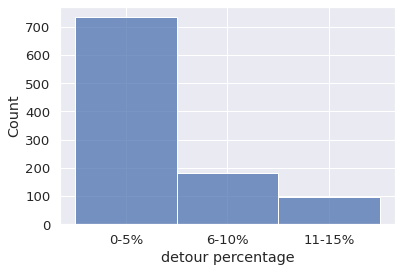

In [33]:
liste = [{"id":i,"detour":detours[i],"detour percentage":detour_labels[i]} for i in range(len(detours))]
import pandas as pd
df = pd.DataFrame(liste)
df.sort_values(by="detour",inplace=True)
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.2)
plot = sns.histplot(data=df,x="detour percentage")

plt.show()

In [34]:
current_env_drivers = read_data("/content/drive/MyDrive/pickle/env_current_system_drivers.pkl")
integrated_env_drivers = read_data("/content/drive/MyDrive/pickle/env_integrated_system_drivers.pkl")
current_env_riders = read_data("/content/drive/MyDrive/pickle/env_current_system_riders.pkl")
integrated_env_riders = read_data("/content/drive/MyDrive/pickle/env_integrated_system_riders.pkl")

In [35]:
current_env_drivers[0]

{'id': 0, 'boarding_alighting_list': [], 'riders': []}

In [36]:
current_km = 0
integrated_km= 0
for rider in integrated_env_riders:
  current_km += rider['total distance']
  drivers = []
  for driver in integrated_env_drivers:
    if rider['id'] in driver['riders']:
      drivers.append(driver['id'])
  if drivers != [] :
    for driver in drivers:
      stops_df = feed.stops
      stop_ids_list = trajectories_list[driver]
      detour_distance = compute_distance(stop_ids_list)
      integrated_km += detour_distance - compute_distance([stop_ids_list[0],stop_ids_list[-1]])
  else:
    integrated_km += rider['total distance']


  

In [37]:
print("private car kilometers = ",current_km)
print("with integrated kilometers = ",integrated_km)
saved_km = current_km-integrated_km
print("saved kilometers = ",current_km-integrated_km)
metric = saved_km*2*97
print("metric result = ",metric*0.001)

private car kilometers =  6803.907886824718
with integrated kilometers =  466.03754011230507
saved kilometers =  6337.870346712413
metric result =  1229.546847262208


In [38]:
'''import pickle
with open('/content/drive/MyDrive/trajectories_list.pickle', 'wb') as handle:
      pickle.dump(trajectories_list,handle)
with open('/content/drive/MyDrive/stops_df.pickle', 'wb') as handle:
      pickle.dump(stops_df,handle)'''

"import pickle\nwith open('/content/drive/MyDrive/trajectories_list.pickle', 'wb') as handle:\n      pickle.dump(trajectories_list,handle)\nwith open('/content/drive/MyDrive/stops_df.pickle', 'wb') as handle:\n      pickle.dump(stops_df,handle)"

In [39]:
integrated_system_drivers[3]

{'id': 3,
 'boarding_alighting_list': [[datetime.time(19, 56), datetime.time(20, 0, 4)],
  [datetime.time(20, 0, 4), datetime.time(20, 19, 38)],
  [datetime.time(19, 56), datetime.time(20, 19, 38)],
  [datetime.time(19, 56), datetime.time(20, 0, 4)]]}

In [40]:
current_system_drivers = read_data('/content/drive/MyDrive/pickle/current_system_drivers.pkl')
current_system_riders = read_data('/content/drive/MyDrive/pickle/current_system_riders.pkl')
integrated_system_riders = read_data('/content/drive/MyDrive/pickle/integrated_system_riders.pkl')
riders_data = read_data("/content/drive/MyDrive/pickle/riders_data_actual.pkl")

In [41]:
riders_data[3]

{'id': 'Rider_4',
 'origin': (45.47801149509832, -122.71560773272672),
 'destination': (45.538043090134664, -122.60706113402487),
 'departure_time': 684,
 'otp_request': 'http://localhost:8803/otp/routers/current/plan?&fromPlace=45.47801149509832%2C-122.71560773272672&toPlace=45.538043090134664%2C-122.60706113402487&time=11%3A24am&date=07-20-2022&mode=TRANSIT%2CWALK&maxWalkDistance=2500.032&arriveBy=false&wheelchair=false&showIntermediateStops=true&debugItineraryFilter=false&additionalParameters=numItineraries&numItineraries=10&locale=en'}

In [42]:
#get riders served in integrated but unserved in current
riders_list = []
for int_rider in integrated_system_riders:
  for curr_rider in current_system_riders:
    if int_rider['id'] == curr_rider['id']:
      if int_rider['solution'] == 'integrated' and curr_rider['solution'] == "unserved":
        riders_list.append(int_rider)

In [43]:
riders_list[3]

{'id': 'Rider_80',
 'waiting time': 8,
 'walking distance': 2.433468,
 'status': 'served',
 'solution': 'integrated',
 'total duration': 81,
 'total distance': 14.587463118091234}

In [44]:
full_dict_of_riders = []
for rider in riders_data:
  for item in riders_list :
    if rider["id"] == item["id"]:
      full_dict_of_riders.append({
          "id" : rider["id"],
          'otp_request' : rider['otp_request'],
          'origin': rider['origin'],
          'destination': rider['destination'],
          'departure_time': rider['departure_time'],          
      })


In [45]:
full_dict_of_riders[0]

{'id': 'Rider_48',
 'otp_request': 'http://localhost:8803/otp/routers/current/plan?&fromPlace=45.429626665097146%2C-122.79705748339927&toPlace=45.569778979930206%2C-122.59708100759116&time=10%3A38am&date=07-20-2022&mode=TRANSIT%2CWALK&maxWalkDistance=2500.032&arriveBy=false&wheelchair=false&showIntermediateStops=true&debugItineraryFilter=false&additionalParameters=numItineraries&numItineraries=10&locale=en',
 'origin': (45.429626665097146, -122.79705748339927),
 'destination': (45.569778979930206, -122.59708100759116),
 'departure_time': 638}

In [46]:
len(riders_list)

434

In [47]:
with open('/content/drive/MyDrive/environment_stat_riders.pickle', 'wb') as handle:
      pickle.dump(full_dict_of_riders,handle)

# Costs
This section is dedicated to the computation of costs in the project

In [48]:
costs_integrated_system_drivers = read_data('/content/drive/MyDrive/pickle/costs_integrated_system_drivers.pkl')
costs_integrated_system_riders = read_data('/content/drive/MyDrive/pickle/costs_integrated_system_riders.pkl')

In [49]:

## IMPORTANT CONSTANTS
alpha = 0.7 
vot = 20/60 # 20 euros per hour/minutes

def driver_capacity(item):
    capacity = 0
    times_list = item["boarding_alighting_list"]
    if len(times_list) == 1:
        capacity = 1
    if len(times_list) >1:
        intersections = []
        
        for i in range(len(times_list)):
            intersection_value = 0
            for j in range(i+1,len(times_list)):
                if (times_list[i][0] <times_list[j][0] and times_list[i][1]>times_list[j][0]) | (times_list[i][0]<times_list[j][1] and times_list[i][1]>times_list[j][1]):
                    intersection_value += 1
            intersections.append(intersection_value)
        capacity = max(intersections)
    if capacity > 4 :
      return -1
    else:
      return capacity

def compute_distance_from_coordinates(origin,destination):
    import math

    circuity = 1
    distance = 0

    lat1 = origin[0]
    lat2 = destination[0]
    lon1 = origin[1]
    lon2 = destination[1]

    φ1 = lat1 * math.pi/180; # φ, λ in radians
    φ2 = lat2 * math.pi/180;
    Δφ = (lat2-lat1) * math.pi/180;
    Δλ = (lon2-lon1) * math.pi/180;

    p = 0.017453292519943295;    # Math.PI / 180
    c = math.cos;
    a = 0.5 - c((lat2 - lat1) * p)/2 + c(lat1 * p) * c(lat2 * p) * (1 - c((lon2 - lon1) * p))/2;
    distance += 12742 * math.asin(math.sqrt(a)) # 2 * R; R = 6371 km

    return circuity * distance; 

def rider_cost_p(rider,data):
    
    org = data['origin']
    dst = data['destination']
    distance = compute_distance_from_coordinates(org,dst)
    Kpark = 10 #random for now

    return distance*(alpha + vot/car_speed) + Kpark

def price_to_pay(rider,data):

    ptp = rider_cost_p(rider,data) - vot*pool_time(rider)/60
    #print("price to pay = ",ptp)
    #print("rider cost p = ",rider_cost_p(r,speed,G))
    #print("value of time and pool time = ",vot*pool_time(r,G))
    return ptp

def pool_time(rider):

    t_pool = rider['total duration']

    return t_pool

def driver_added_cost(trajectory,i):

    
    stops_df = feed.stops
    stop_ids_list = trajectory
    detour_distance = compute_distance(stop_ids_list)
    #print("detour_distance(km) = ",detour_distance)
    original_distance = compute_distance(["DRIVER_origin_"+str(i+1),"DRIVER_destination_"+str(i+1)])
    #print("original_distance(km) = ",original_distance)
    #print("detour percentage = ",(detour_distance - original_distance)*100/original_distance,"%")
    detour = (detour_distance - original_distance)
    detour_percent= (detour_distance - original_distance)*100/original_distance
    return detour*(alpha + vot/car_speed),detour_percent

def compute_co2_emissions(rider):
  integrated_km = 0
  private_km = rider['total distance']
  drivers = []
  for driver in costs_integrated_system_drivers:
    if rider['id'] in driver['riders']:
      drivers.append(driver['id'])
  if drivers != [] :
    for driver in drivers : 
      stops_df = feed.stops
      stop_ids_list = trajectories_list[driver]
      detour_distance = compute_distance(stop_ids_list) - compute_distance([stop_ids_list[0],stop_ids_list[-1]])
      integrated_km += detour_distance
    #print(integrated_km)
  else:
    integrated_km = rider['total distance']
  return (private_km-integrated_km)*2*97*0.001


def profit_with_co2():
  
  rider_cost_list = []#pd.DataFrame(columns=["rider_id","price_to_pay","private_car_cost","system_cost","solution","system_travel_time","private_travel_time"])
  driver_cost_list = []#pd.DataFrame(columns = ['driver_id','money_received','detour',"maximum_capacity"])
  money_received_by_riders = 0 
  money_paid_to_drivers = 0
  co2_gained = 0

  for rider in costs_integrated_system_riders:
    for data in riders_data:
      if rider['id'] == data['id']:
        if rider['solution'] in ["integrated","carpooling","multi carpooling","transit"] : 
          single_rider_price = price_to_pay(rider,data)
          org = data['origin']
          dst = data['destination']
          private_time = int(compute_distance_from_coordinates(org,dst)*60/car_speed)
          money_received_by_riders += single_rider_price
          co2_gained += compute_co2_emissions(rider)*50*0.001 
          rider_cost_list.append({"rider_id" : rider['id'],
                                "price_to_pay":single_rider_price,
                                "private_car_cost":rider_cost_p(rider,data),
                                "system_cost":vot*pool_time(rider)/60,
                                "solution":rider['solution'],
                                "system_travel_time" :rider['total duration'],
                                "private_travel_time" : private_time,
                                "private_km" : rider['total distance'],
                                "CO2" : compute_co2_emissions(rider)})
          #print("_______rider : ",rider["id"]," paid : ",single_rider_price,"_______________")

  for i in range(len(integrated_system_drivers)):
    if integrated_system_drivers[i]["boarding_alighting_list"] != [] :
      if driver_capacity(integrated_system_drivers[i]) >= 0 :
        single_amount, detour_percent = driver_added_cost(trajectories_list[i],i) 
        money_paid_to_drivers += single_amount
        driver_cost_list.append({"driver_id":integrated_system_drivers[i]['id'],
                               "money_received":single_amount,
                               "detour":int(detour_percent),
                               "maximum_capacity":driver_capacity(integrated_system_drivers[i])})

  ## CO2 GAINS
  print("co2 gained in kilograms = ",co2_gained)
  profit = money_received_by_riders - money_paid_to_drivers + co2_gained
  return profit, pd.DataFrame(rider_cost_list),pd.DataFrame(driver_cost_list)
def profit(riders,drivers):

  rider_cost_list = []#pd.DataFrame(columns=["rider_id","price_to_pay","private_car_cost","system_cost","solution","system_travel_time","private_travel_time"])
  driver_cost_list = []#pd.DataFrame(columns = ['driver_id','money_received','detour',"maximum_capacity"])
  money_received_by_riders = 0 
  money_paid_to_drivers = 0

  for rider in riders:
    for data in riders_data:
      if rider['id'] == data['id']:
        if rider['solution'] in ["integrated","carpooling","multi carpooling","transit"] : 
          single_rider_price = price_to_pay(rider,data)
          org = data['origin']
          dst = data['destination']
          private_time = int(compute_distance_from_coordinates(org,dst)*60/car_speed)
          money_received_by_riders += single_rider_price
          rider_cost_list.append({"rider_id" : rider['id'],
                                "price_to_pay":single_rider_price,
                                "private_car_cost":rider_cost_p(rider,data),
                                "system_cost":vot*pool_time(rider)/60,
                                "solution":rider['solution'],
                                "system_travel_time" :rider['total duration'],
                                "private_travel_time" : private_time,
                                "private_km" : rider['total distance']})
          #print("_______rider : ",rider["id"]," paid : ",single_rider_price,"_______________")

  for i in range(len(drivers)):
    if drivers[i]["boarding_alighting_list"] != [] :
      if driver_capacity(drivers[i]) >= 0 :
        single_amount, detour_percent = driver_added_cost(trajectories_list[i],i) 
        money_paid_to_drivers += single_amount
        driver_cost_list.append({"driver_id":drivers[i]['id'],
                               "money_received":single_amount,
                               "travel distance": compute_distance(trajectories_list[i]),
                               "detour":int(detour_percent),
                               "maximum_capacity":driver_capacity(drivers[i])})

  ## CO2 GAINS

  profit = money_received_by_riders - money_paid_to_drivers
  return profit, pd.DataFrame(rider_cost_list),pd.DataFrame(driver_cost_list)



In [50]:
integrated_profit,rider_cost_df,driver_cost_df = profit(costs_integrated_system_riders,costs_integrated_system_drivers)
print("profit = ",integrated_profit)

profit =  65684.55693357247


In [51]:
driver_cost_df

,driver_id,money_received,travel distance,detour,maximum_capacity
0,3,0.720341,15.757690,6,1
1,9,0.952319,28.359080,4,1
2,10,0.118308,14.112708,1,0
3,12,1.570969,21.108064,11,0
4,19,0.032262,8.361076,0,1
...,...,...,...,...,...
999,2839,0.003859,21.037996,0,0
1000,2840,0.061702,24.038002,0,0
1001,2841,0.012895,15.514768,0,1
1002,2845,0.000000,12.761248,0,1


In [52]:
rider_cost_df["Efficiency"] = [row['private_km']/row['price_to_pay'] for id,row in rider_cost_df.iterrows()]

In [53]:
rider_cost_df.head()

,rider_id,price_to_pay,private_car_cost,system_cost,solution,system_travel_time,private_travel_time,private_km,Efficiency
0,Rider_1,15.075582,15.370027,0.294444,transit,53,11,7.581214,0.502880
1,Rider_3,15.310438,15.560438,0.250000,transit,45,11,7.850030,0.512724
2,Rider_4,17.288061,17.632506,0.344444,transit,62,16,10.775302,0.623280
3,Rider_5,22.088583,22.666361,0.577778,transit,104,26,17.881921,0.809555
4,Rider_6,12.775898,12.953676,0.177778,integrated,32,6,4.169896,0.326388


In [54]:
rider_cost_df.describe()

,price_to_pay,private_car_cost,system_cost,system_travel_time,private_travel_time,private_km,Efficiency
count,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000,3521.000000
mean,18.793152,19.116754,0.323603,58.248509,18.791821,12.870712,0.628743
std,5.148591,5.240362,0.128452,23.121330,11.099324,7.398157,0.216802
min,9.989665,10.234110,0.027778,5.000000,0.000000,0.330508,0.033085
25%,15.045821,15.317496,0.233333,42.000000,11.000000,7.507054,0.499377
50%,17.980239,18.311702,0.311111,56.000000,17.000000,11.734167,0.651738
75%,21.917955,22.304985,0.405556,73.000000,26.000000,17.371743,0.792087
max,38.731040,39.236595,0.788889,142.000000,61.000000,41.275193,1.065688


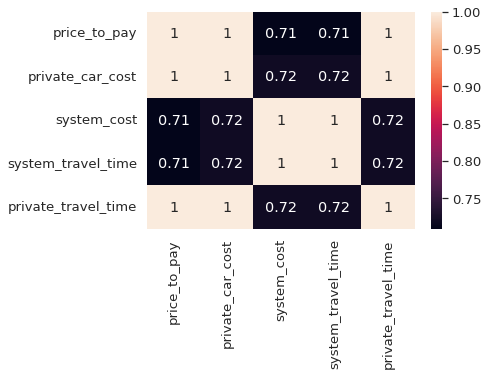

In [56]:
sns.heatmap(rider_cost_df[["price_to_pay",	"private_car_cost",	"system_cost",	"system_travel_time",	"private_travel_time"]].corr(),annot=True)

In [57]:



for driver in costs_integrated_system_drivers:
    if "Rider_2636" in driver["riders"]:
      print(driver["id"])

for rider in costs_integrated_system_riders:
  if rider["id"] == "Rider_2636":
    print(rider["total distance"])
detour_distance_of_drivers = 0
for item in [468]:
  print("distance of ",item," = ",compute_distance(trajectories_list[item]))
  print("original distance = ",compute_distance([trajectories_list[item][0],trajectories_list[item][-1]]))
  detour_distance_of_drivers = compute_distance(trajectories_list[item]) - compute_distance([trajectories_list[item][0],trajectories_list[item][-1]])
  print("detour distance of ",item," = ", detour_distance_of_drivers)
print("gained kilometers = ",detour_distance_of_drivers)

468
0.5991887256212745
distance of  468  =  23.738442168424175
original distance =  22.72549787266
detour distance of  468  =  1.012944295764175
gained kilometers =  1.012944295764175


In [58]:
# one hot encoding of solution
rider_cost_df['integrated'] = [1 if x == 'integrated' else 0 for x in rider_cost_df['solution']]
rider_cost_df["carpooling"] = [1 if x == "carpooling" else 0 for x in rider_cost_df['solution']]
rider_cost_df["multi carpooling"] = [1 if x == "multi carpooling" else 0 for x in rider_cost_df['solution']]
rider_cost_df["transit"] = [1 if x == "transit" else 0 for x in rider_cost_df['solution']]
rider_cost_df.head(5)

,rider_id,price_to_pay,private_car_cost,system_cost,solution,system_travel_time,private_travel_time,private_km,Efficiency,integrated,carpooling,multi carpooling,transit
0,Rider_1,15.075582,15.370027,0.294444,transit,53,11,7.581214,0.502880,0,0,0,1
1,Rider_3,15.310438,15.560438,0.250000,transit,45,11,7.850030,0.512724,0,0,0,1
2,Rider_4,17.288061,17.632506,0.344444,transit,62,16,10.775302,0.623280,0,0,0,1
3,Rider_5,22.088583,22.666361,0.577778,transit,104,26,17.881921,0.809555,0,0,0,1
4,Rider_6,12.775898,12.953676,0.177778,integrated,32,6,4.169896,0.326388,1,0,0,0


In [60]:
import plotly.express as px
from sklearn.decomposition import PCA

df = rider_cost_df
X = df[["integrated","carpooling","multi carpooling","transit","private_travel_time","system_travel_time"]]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['price_to_pay'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [61]:
df = rider_cost_df
X = df[["integrated","carpooling","multi carpooling","transit","price_to_pay",'system_travel_time']]

pca = PCA(n_components=2)
components = pca.fit_transform(X)
fig = px.scatter(components, x=0, y=1, color=df['price_to_pay']    ,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2'})
fig.show()

ValueError: ignored

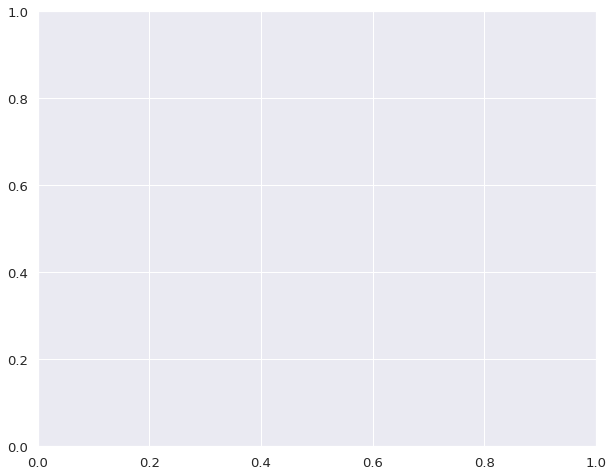

In [62]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(y="CO2",x="system_travel_time",ax = ax,hue="solution",data=df)
plt.show()

# Profit of current system 

In [63]:
current_profit,current_rider_cost_df,current_driver_cost_df = profit(current_system_riders,current_system_drivers)

In [64]:
print((integrated_profit - current_profit)*100/current_profit)

15.785216864349605


# ECDF 

In [65]:
df = pd.merge(current_rider_cost_df,rider_cost_df,how="right",on="rider_id")
df.head(10)
df.rename(columns = {"price_to_pay_x" : "price_to_pay_current","price_to_pay_y":"price_to_pay_integrated"},inplace=True)
df.head(10)

,rider_id,price_to_pay_current,private_car_cost_x,system_cost_x,solution_x,system_travel_time_x,private_travel_time_x,private_km_x,price_to_pay_integrated,private_car_cost_y,system_cost_y,solution_y,system_travel_time_y,private_travel_time_y,private_km_y,Efficiency,integrated,carpooling,multi carpooling,transit
0,Rider_1,15.075582,15.370027,0.294444,transit,53.0,11.0,7.581214,15.075582,15.370027,0.294444,transit,53,11,7.581214,0.502880,0,0,0,1
1,Rider_3,15.310438,15.560438,0.250000,transit,45.0,11.0,7.850030,15.310438,15.560438,0.250000,transit,45,11,7.850030,0.512724,0,0,0,1
2,Rider_4,17.288061,17.632506,0.344444,transit,62.0,16.0,10.775302,17.288061,17.632506,0.344444,transit,62,16,10.775302,0.623280,0,0,0,1
3,Rider_5,22.088583,22.666361,0.577778,transit,104.0,26.0,17.881921,22.088583,22.666361,0.577778,transit,104,26,17.881921,0.809555,0,0,0,1
4,Rider_6,12.759232,12.953676,0.194444,transit,35.0,6.0,4.169896,12.775898,12.953676,0.177778,integrated,32,6,4.169896,0.326388,1,0,0,0
5,Rider_7,13.138816,13.322150,0.183333,transit,33.0,7.0,4.690094,13.138816,13.322150,0.183333,transit,33,7,4.690094,0.356965,0,0,0,1
6,Rider_8,24.312334,24.879001,0.566667,transit,102.0,31.0,21.005648,24.312334,24.879001,0.566667,transit,102,31,21.005648,0.863991,0,0,0,1
7,Rider_9,16.464713,16.792490,0.327778,transit,59.0,14.0,9.589398,16.553602,16.792490,0.238889,integrated,43,14,9.589398,0.579294,1,0,0,0
8,Rider_13,14.444244,14.877577,0.433333,transit,78.0,10.0,6.885991,14.444244,14.877577,0.433333,transit,78,10,6.885991,0.476729,0,0,0,1
9,Rider_15,11.681332,11.775776,0.094444,carpooling,17.0,3.0,2.506978,11.681332,11.775776,0.094444,carpooling,17,3,2.506978,0.214614,0,1,0,0


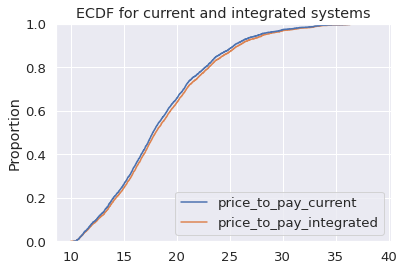

In [66]:
# ecdf for current system
import matplotlib.pyplot as plt
sns.ecdfplot(data=df[["price_to_pay_current","price_to_pay_integrated"]])
plt.title('ECDF for current and integrated systems')
plt.show()

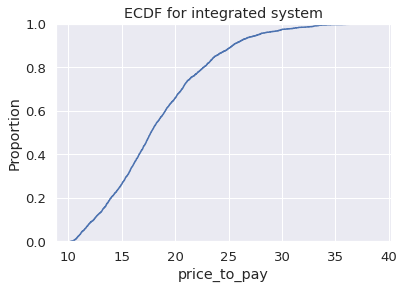

In [67]:
# ecdf for integrated system
sns.ecdfplot(data=current_rider_cost_df, x="price_to_pay")
plt.title('ECDF for integrated system')
plt.show()

# Kilometers formula
we compute the number of kilometers done in the current system,
that we then subtract by the difference (int - current)

In [68]:
print(env_current_system_riders[0])

NameError: ignored

In [71]:
current_kilometers = current_driver_cost_df["travel distance"].sum()
# we add the people that took their private cars
env_current_system_riders = read_data("/content/drive/MyDrive/pickle/env_current_system_riders.pkl")
series = pd.Series([x['total distance'] for x in env_current_system_riders])
current_kilometers += series.sum() 
#print(series.head())


integrated_kilometers = driver_cost_df["travel distance"].sum()
delta = integrated_kilometers - current_kilometers
improvement_of_travel_distance = current_kilometers - delta
print("monetary value of delta by hour = ",-delta*2*96*50*0.000001)
print("kilometers in current = ",current_kilometers)
print("kilometers in integrated = ",integrated_kilometers)
print("difference in kilometers = ",delta)
print("current - delta = ",improvement_of_travel_distance)
print("CO2 change(per ton per hour) = ",improvement_of_travel_distance*2 * 96 * 0.000001)
print("the integrated system costs 94 euros/hour more than current in CO2 amount alone")
print("CO2 change(per euros/hour) = ",improvement_of_travel_distance*2 * 96 *50* 0.000001)


monetary value of delta by hour =  30.641923810753504
kilometers in current =  20282.469271541027
kilometers in integrated =  17090.60220792087
difference in kilometers =  -3191.867063620157
current - delta =  23474.336335161184
CO2 change(per ton per hour) =  4.507072576350947
the integrated system costs 94 euros/hour more than current in CO2 amount alone
CO2 change(per euros/hour) =  225.35362881754736


# Implementing payment strategies

In [72]:
total_driver_costs_int = driver_cost_df["money_received"].sum()
total_driver_costs_curr = current_driver_cost_df["money_received"].sum()

The first case is : we only make profitable people pay. We will need to compute driver costs again given our riders dataframe

In [73]:
def get_riders_of_driver(driver,riders):
  riders_list = []
  for rider in riders :
    if rider["id"] in driver["riders"] : 
      riders_list.append(rider["id"])
  return riders_list

def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

def drivers_costs(rider_cost_df,drivers,riders,threshold_value=0,threshold=True):
  driver_cost_list = []
  money_paid_to_drivers = 0
  already_counted_riders = []

  for i in range(len(drivers)):
    if drivers[i]["boarding_alighting_list"] != [] :
      riders_list = []
      #print(drivers[i])
      riders_list = get_riders_of_driver(drivers[i],riders) 
      for rider in riders_list :
        if rider in list(rider_cost_df["rider_id"]):
          if rider not in already_counted_riders :
            if threshold :
              if rider_cost_df[rider_cost_df["rider_id"]==rider]["price_to_pay"].iloc[0] > threshold_value :
                if driver_capacity(drivers[i]) >= 0 :
                # print(rider_cost_df[rider_cost_df["rider_id"]==rider]["price_to_pay"].iloc[0])
                  single_amount, detour_percent = driver_added_cost(trajectories_list[i],i) 
                  money_paid_to_drivers += single_amount
                  driver_cost_list.append({"driver_id":drivers[i]['id'],
                                          "money_received":single_amount,
                                          "travel distance": compute_distance(trajectories_list[i]),
                                          "detour":int(detour_percent),       
                                          "maximum_capacity":driver_capacity(drivers[i])})
            else :
                if driver_capacity(drivers[i]) >= 0 :
                # print(rider_cost_df[rider_cost_df["rider_id"]==rider]["price_to_pay"].iloc[0])
                  single_amount, detour_percent = driver_added_cost(trajectories_list[i],i) 
                  money_paid_to_drivers += single_amount
                  driver_cost_list.append({"driver_id":drivers[i]['id'],
                                          "money_received":single_amount,
                                          "travel distance": compute_distance(trajectories_list[i]),
                                          "detour":int(detour_percent),       
                                          "maximum_capacity":driver_capacity(drivers[i])})              
        # update already counted riders
        for rider in riders_list:
          if rider not in already_counted_riders:
            already_counted_riders.append(rider)
        #print(already_counted_riders)

  return money_paid_to_drivers



In [74]:
total_driver_costs_int = drivers_costs(rider_cost_df,costs_integrated_system_drivers,costs_integrated_system_riders)
total_driver_costs_curr = drivers_costs(current_rider_cost_df,current_system_drivers,current_system_riders)


In [75]:
print("all drivers costs = ",driver_cost_df["money_received"].sum())
print("cost of drivers that took positive costing riders only = ",total_driver_costs_int)
print("profit for only positive riders in integrated = ",rider_cost_df[rider_cost_df["price_to_pay"] >0]["price_to_pay"].sum() - total_driver_costs_int)
print("profit for only positive riders in current = ",current_rider_cost_df[current_rider_cost_df["price_to_pay"] >0]["price_to_pay"].sum() - total_driver_costs_curr)

all drivers costs =  486.12958468433476
cost of drivers that took positive costing riders only =  324.1277225499618
profit for only positive riders in integrated =  65846.55879570682
profit for only positive riders in current =  56903.82190125298


## Second cost strategy
We pay drivers that take riders that pay above a certain threshold

In [81]:
threshold = 20
total_driver_costs_int = drivers_costs(rider_cost_df,costs_integrated_system_drivers,costs_integrated_system_riders,threshold_value=threshold)
total_driver_costs_curr = drivers_costs(current_rider_cost_df,current_system_drivers,current_system_riders,threshold_value=threshold)

In [82]:
print("all drivers costs = ",driver_cost_df["money_received"].sum())
print("cost of drivers that took positive costing riders only = ",total_driver_costs_int)
print("profit for only riders that pay above ",threshold," in integrated = ",rider_cost_df[rider_cost_df["price_to_pay"] >threshold]["price_to_pay"].sum() - total_driver_costs_int)
print("profit for only riders that pay above ",threshold," in current = ",current_rider_cost_df[current_rider_cost_df["price_to_pay"] >threshold]["price_to_pay"].sum() - total_driver_costs_curr)

all drivers costs =  486.12958468433476
cost of drivers that took positive costing riders only =  186.01949783307626
profit for only riders that pay above  20  in integrated =  30755.664435869418
profit for only riders that pay above  20  in current =  25291.423712556225


In [83]:
print(max(rider_cost_df["price_to_pay"]))

38.73103961214755


We can analyze how profit changes according to the payment threshold


In [84]:
from tqdm import tqdm
payment_list = []
for i in tqdm(range(0,39,5)):
  threshold = i
  total_driver_costs_int = drivers_costs(rider_cost_df,costs_integrated_system_drivers,costs_integrated_system_riders,threshold_value=threshold)
  payment_list.append([i,rider_cost_df[rider_cost_df["price_to_pay"] >threshold]["price_to_pay"].sum() - total_driver_costs_int])



100%|██████████| 8/8 [02:17<00:00, 17.13s/it]


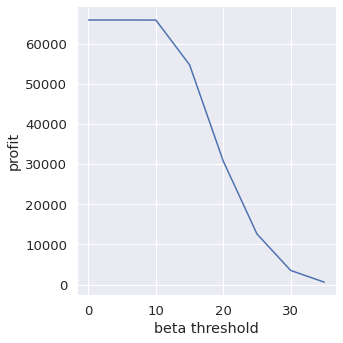

In [85]:
df = pd.DataFrame(payment_list,columns=["beta threshold","profit"])
sns.relplot(
    data=df, kind="line",
    x="beta threshold", y="profit"
)

# calculer l'efficacité d'un rider

In [86]:
rider_cost_df.head()

,rider_id,price_to_pay,private_car_cost,system_cost,solution,system_travel_time,private_travel_time,private_km,Efficiency,integrated,carpooling,multi carpooling,transit
0,Rider_1,15.075582,15.370027,0.294444,transit,53,11,7.581214,0.502880,0,0,0,1
1,Rider_3,15.310438,15.560438,0.250000,transit,45,11,7.850030,0.512724,0,0,0,1
2,Rider_4,17.288061,17.632506,0.344444,transit,62,16,10.775302,0.623280,0,0,0,1
3,Rider_5,22.088583,22.666361,0.577778,transit,104,26,17.881921,0.809555,0,0,0,1
4,Rider_6,12.775898,12.953676,0.177778,integrated,32,6,4.169896,0.326388,1,0,0,0


In [87]:
rider_cost_df["efficiency"] = [row["private_km"]/row["price_to_pay"] for id,row in rider_cost_df.iterrows()]
rider_cost_df.head()

,rider_id,price_to_pay,private_car_cost,system_cost,solution,system_travel_time,private_travel_time,private_km,Efficiency,integrated,carpooling,multi carpooling,transit,efficiency
0,Rider_1,15.075582,15.370027,0.294444,transit,53,11,7.581214,0.502880,0,0,0,1,0.502880
1,Rider_3,15.310438,15.560438,0.250000,transit,45,11,7.850030,0.512724,0,0,0,1,0.512724
2,Rider_4,17.288061,17.632506,0.344444,transit,62,16,10.775302,0.623280,0,0,0,1,0.623280
3,Rider_5,22.088583,22.666361,0.577778,transit,104,26,17.881921,0.809555,0,0,0,1,0.809555
4,Rider_6,12.775898,12.953676,0.177778,integrated,32,6,4.169896,0.326388,1,0,0,0,0.326388


In [88]:
max(rider_cost_df["efficiency"])

1.0656877169129304

In [89]:
min(rider_cost_df["efficiency"])

0.033084950778748776

In [90]:
# isolate riders with efficiency threshold
efficiency_threshold = 0
efficiency_rider_df = rider_cost_df[rider_cost_df["efficiency"] >= efficiency_threshold]
driver_cost_without_efficiency =  drivers_costs(rider_cost_df,costs_integrated_system_drivers,costs_integrated_system_riders,threshold_value=threshold,threshold=False)
driver_costs_eff_int =  drivers_costs(efficiency_rider_df,costs_integrated_system_drivers,costs_integrated_system_riders,threshold_value=threshold,threshold=False)

In [91]:
print(driver_costs_eff_int)
print(driver_cost_without_efficiency)

324.1277225499618
324.1277225499618


In [92]:
efficiency_list = []

for i in tqdm([k*0.1 for k in range(11)]):
  efficiency_threshold = i
  efficiency_rider_df = rider_cost_df[rider_cost_df["efficiency"] >= efficiency_threshold]
  driver_costs_eff_int =  drivers_costs(efficiency_rider_df,costs_integrated_system_drivers,costs_integrated_system_riders,threshold_value=threshold,threshold=False)
  efficiency_list.append([i,driver_costs_eff_int,efficiency_rider_df["price_to_pay"].sum() - driver_costs_eff_int])

100%|██████████| 11/11 [03:22<00:00, 18.44s/it]


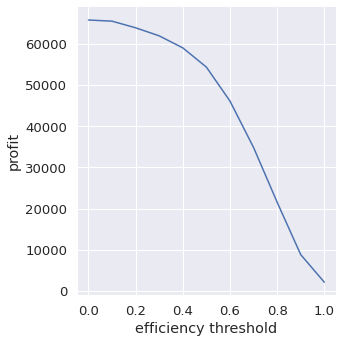

In [93]:
df = pd.DataFrame(efficiency_list,columns=["efficiency threshold","driver costs","profit"])
sns.relplot(
    data=df, kind="line",
    x="efficiency threshold", y="profit"
)

As a last experiment, let's combine both beta and efficiency thinking to see if those two strategies can reach an optimal position

In [94]:
combined_list = []
for j in tqdm(range(0,39,5)):
  for i in [k*0.1 for k in range(11)]:
    efficiency_threshold = i
    threshold = j
    combined_rider_df = rider_cost_df[rider_cost_df["efficiency"] >= efficiency_threshold] 
    combined_rider_df = combined_rider_df[combined_rider_df["price_to_pay"]>=threshold]
    driver_costs_eff_int =  drivers_costs(combined_rider_df,costs_integrated_system_drivers,costs_integrated_system_riders,threshold_value=threshold,threshold=True)
    combined_list.append([i,j,driver_costs_eff_int,combined_rider_df["price_to_pay"].sum() - driver_costs_eff_int])

100%|██████████| 8/8 [17:06<00:00, 128.37s/it]


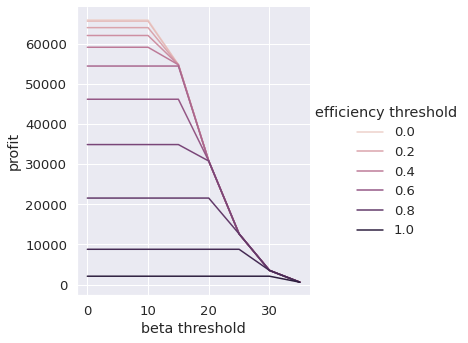

In [95]:
df_combined = pd.DataFrame(combined_list,columns=["efficiency threshold","beta threshold","driver costs","profit"])
sns.relplot(
    data=df_combined, kind="line",
    x="beta threshold", y="profit",hue="efficiency threshold"
)

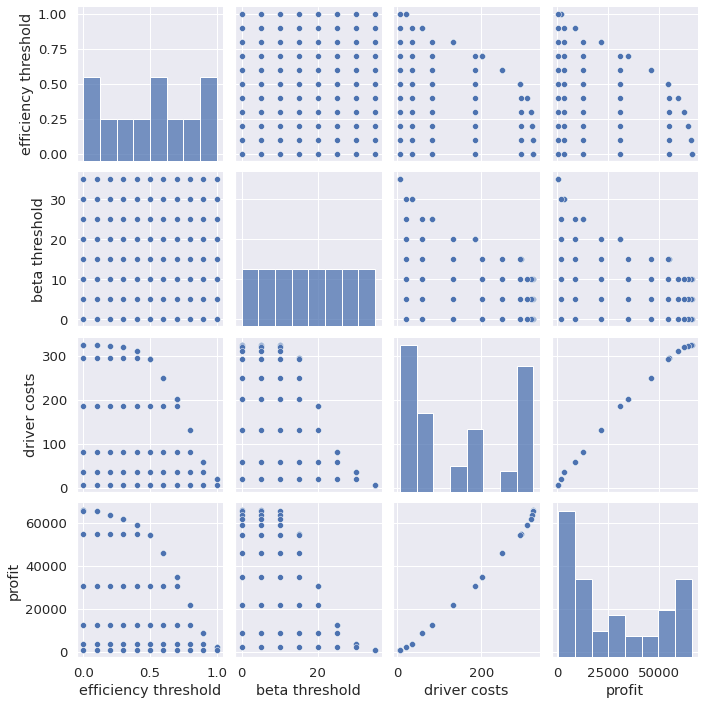

In [96]:
sns.pairplot(df_combined)